# Linear Regression
다음의 항목들에 대해서 학습합니다.

* 선형회귀(Linear Regression)
* 회귀모델 평가


## 1.환경준비

### (1) Import

In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

### (2) data loading

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)

|	변수	|	설명	|
|	----	|	----	|
|	**medv**	|	**타운별 집값(중위수), target**	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율, 편의시설(관공서, 주요 시설)	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	black	|	인구 중 흑인 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 이해

### (1) 둘러보기

In [3]:
# 상/하위 몇개 행을 살펴 봅시다.
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# 각 칼럼의 타입을 살펴 봅시다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## 3.데이터 준비

### (1) 데이터 정리

In [5]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.drop(['black'], axis = 1, inplace = True)

### (2) 데이터분할1 : x, y 나누기

In [7]:
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

### (5) 데이터분할2 : train : validation 나누기

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 2022)

### (6) Scaling

## 4.모델링 : 단순회귀

### (1)학습할 데이터 준비

* 모델링을 시작하기 전에...
    * 데이터를 살펴보면서, 어떤 변수가 집값을 예측하는데 가장 중요할까요?

In [ ]:
# lstat

* lstat(하위계층 비율)로만 집값(medv)을 예측하는 모델을 만들어 봅시다.

In [11]:
# 학습에 사용할 변수를 지정합니다.
features = ['lstat'] # 리스트

# 지정된 변수로 데이터셋을 만듭니다. 
# 학습과 검증시 아래 데이터셋 이름을 사용합니다.
x_train1 = x_train[features] # df[list] => df // df[value] => series
x_val1 = x_val[features]     # 2차원 변수(df)가 필요함

In [12]:
x_train1.head()

,lstat
257,5.12
371,9.53
253,3.54
332,7.83
454,18.71


In [16]:
x_train1.count()

lstat    354
dtype: int64

In [15]:
x_val1.count()

lstat    152
dtype: int64

### (2) 필요한 함수 불러오기
이 부분은 파일의 제일 첫 부분에서 한꺼번에 수행해도 좋습니다.

In [17]:
# 모델링용
from sklearn.linear_model import LinearRegression

# 회귀모델 평가용
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### (3) 모델선언

In [18]:
model1 = LinearRegression()

### (4) 모델링(학습)

In [19]:
model1.fit(x_train1, y_train)

LinearRegression()

* 회귀계수 확인하기

In [20]:
print('회귀계수 : ', model1.coef_)
print('절편 : ', model1.intercept_)

회귀계수 :  [-0.9568563]
절편 :  34.676249051494665


### (5) 검증 : 예측

In [22]:
# 학습할때 x 데이터 구조와 예측할때 x의 구조는 똑같아야 한다.
pred1 = model1.predict(x_val1) 

### (6) 검증 : 평가

* 평가용 함수들은 대부분 (실제값, 예측값)

In [23]:
# 평균오차
mean_absolute_error(y_val   , pred1   )

4.138380487348265

## 5.평가

### (1) 오차의 비로 평가하기 : R2 Score

* 평균 모델의 오차와 회귀모델 오차
    * 평균 모델과 실제 값 과의 차이(SST)
    * 평균 모델과 회귀모델 과의 차이(SSR)
    * 실제 값과 회귀모델 과의 차이(SSE)


In [25]:
tmp_y = y_val[:5]
tmp_p = pred1[:5]
print(tmp_y)
print(tmp_p)

104    20.1
406    11.9
487    20.6
276    33.2
422    20.8
Name: medv, dtype: float64
[22.87821089 12.34322304 23.72024443 28.88726844 21.18457524]


In [26]:
# 실제와 예측 데이터 5건씩 저장
tmp_y = y_val[:5]
tmp_p = pred1[:5]

# 실제값의 평균오차 저장
tmp_y_mean = tmp_y.mean()
tmp_y_mean

21.32

In [27]:
# SST
sst = np.sum(np.power(tmp_y - tmp_y_mean, 2))
print(sst)

232.14800000000005


In [28]:
# SSE
sse = np.sum(np.power(tmp_y - tmp_p, 2))
print(sse)

36.39837929489292


In [33]:
# SSR
ssr = np.sum(np.power(tmp_p - tmp_y_mean, 2))
print(ssr)

146.0536106844669


In [29]:
# R2 Score = 1- SSE/SST
1 - (sse/sst)

0.8432104549903815

In [30]:
# 제공된 함수와 비교해 봅시다.
r2_score(tmp_y, tmp_p)

0.8432104549903815

### (2)오차의 양과 율로 평가하기

In [34]:
# MSE
mean_squared_error( y_val   , pred1   ) 

31.563327757446412

In [35]:
# RMSE
mean_squared_error( y_val   , pred1  , squared = False)

5.618124932523877

In [36]:
# MAE
mean_absolute_error(y_val   , pred1   )

4.138380487348265

In [37]:
# MAPE : 원래 개념은 100(%)을 곱해야 한다. 그렇지만 sklearn 함수는 100 안 곱한채로 결과를 준다.
mean_absolute_percentage_error(y_val   , pred1  )

0.22398686231166276

In [39]:
# 1 - MAPE : 회귀모델의 정확도
1 -  mean_absolute_percentage_error(y_val   , pred1   )
# MAPE > 1 보다 크면 - 값이 나오므로 정확하지 않을수있다.

0.7760131376883372

## 6.연습문제
* 모델을 2개 더 만들어 봅시다. 여러분이 중요하다고 생각한 변수로 모델2, 모델3을 만들어 봅시다.
    * model2 : 중요하다고 생각한 변수1  --> medv
    * model3 : 중요하다고 생각한 변수2  --> medv
* 모델1,2,3의 성능을 비교해 봅시다.
* 평가는 RMSE, MAE, MAPE로 사용

### (1) 모델2

In [40]:
# 학습에 사용할 변수를 지정합니다.
features = ['crim']
x_train2 = x_train[features]
x_val2 = x_val[features]

In [42]:
model2 = LinearRegression()
model2.fit(x_train2, y_train) # x는 2차원이여야 합니다.

LinearRegression()

In [48]:
pred2 = model2.predict(x_val2)
pred[:20]

array([24.30152115, 18.95312175, 18.95312175, 25.50687322, 18.95312175,
       24.53698528, 25.22655878, 24.53698528, 18.95312175, 23.66801053,
       18.95312175, 21.90763589, 23.48860929, 18.95312175, 14.7203738 ,
       27.87833333, 18.95312175, 18.95312175, 18.12339103, 26.63934353])

In [60]:
model2.coef_, model2.intercept_

(array([-0.3570669]), 24.214633238567504)

In [49]:
# RMSE
mean_squared_error( y_val   , pred2  , squared = False)

8.278901155364965

In [50]:
# MAE
mean_absolute_error(y_val   , pred2   )

6.480426640219394

In [51]:
# MAPE
mean_absolute_percentage_error(y_val   , pred2   )

0.40490343077615576

### (2) 모델3

In [54]:
# 학습에 사용할 변수를 지정합니다.
features = ['indus']
x_train3 = x_train[features]
x_val3 = x_val[features]

In [55]:
model3 = LinearRegression()
model3.fit(x_train3, y_train) # x는 2차원이여야 합니다.

LinearRegression()

In [56]:
pred3 = model3.predict(x_val3)
pred[:20]

array([24.30152115, 18.95312175, 18.95312175, 25.50687322, 18.95312175,
       24.53698528, 25.22655878, 24.53698528, 18.95312175, 23.66801053,
       18.95312175, 21.90763589, 23.48860929, 18.95312175, 14.7203738 ,
       27.87833333, 18.95312175, 18.95312175, 18.12339103, 26.63934353])

In [61]:
model3.coef_, model3.intercept_

(array([-0.56062887]), 29.100504261766933)

In [57]:
# RMSE
mean_squared_error( y_val   , pred3  , squared = False)

7.641651069897593

In [58]:
# MAE
mean_absolute_error(y_val   , pred3   )

5.963610772485113

In [59]:
# MAPE
mean_absolute_percentage_error(y_val   , pred3   )

0.38145650203040055

In [67]:
print('lstat : ', model1.coef_, model1.intercept_)
print('crim : ', model2.coef_, model2.intercept_)
print('indus : ', model3.coef_, model3.intercept_)

# 이 값만으로는 어떤값이 가장 중요한지는 알 수 없다.
# 값들의 범위를 알 수 없기 때문에

lstat :  [-0.9568563] 34.676249051494665
crim :  [-0.3570669] 24.214633238567504
indus :  [-0.56062887] 29.100504261766933


* 오차 비교(모델 성능 비교)

In [68]:
# R^2 score 높을수록 좋다.
print('lstat : ', r2_score(y_val, pred1))
print('crim : ', r2_score(y_val, pred2))
print('indus : ', r2_score(y_val, pred3))

lstat :  0.6315401111275217
crim :  0.19988423690315305
indus :  0.31831798175330883


In [69]:
# RMSE 적을수록 좋다.
print('lstat : ', mean_squared_error( y_val   , pred1  , squared = False))
print('crim : ', mean_squared_error( y_val   , pred2  , squared = False))
print('indus : ', mean_squared_error( y_val   , pred3  , squared = False))

lstat :  5.618124932523877
crim :  8.278901155364965
indus :  7.641651069897593


In [73]:
# mae
print('lstat : ', mean_absolute_error(y_val   , pred1   ))
print('crim : ', mean_absolute_error(y_val   , pred2   ))
print('indus : ', mean_absolute_error(y_val   , pred3   ))

lstat :  4.138380487348265
crim :  6.480426640219394
indus :  5.963610772485113


In [72]:
# mape
print('lstat : ', mean_absolute_percentage_error(y_val   , pred1   ))
print('crim : ', mean_absolute_percentage_error(y_val   , pred2   ))
print('indus : ', mean_absolute_percentage_error(y_val   , pred3   ))

lstat :  0.22398686231166276
crim :  0.40490343077615576
indus :  0.38145650203040055


## 7.모델링2 : 다중회귀

* 이번에는 다음의 변수로 예측하는 모델을 각각 만들어 봅시다.
    * model4 : lstat + ptratio 
    * model5 : lstat + ptratio + crim
    * model6 : 전체 변수

### (1) 모델4 

In [75]:
# 학습에 사용할 변수를 지정합니다.
features = ['lstat', 'ptratio']
x_train4 = x_train[features]
x_val4 = x_val[features]

In [77]:
model4 = LinearRegression()
model4.fit(x_train4, y_train)
pred4 = model4.predict(x_val4)

In [78]:
model4.coef_, model4.intercept_

(array([-0.82877003, -1.25776375]), 56.231763304678594)

### (2) 모델5 

In [76]:
# 학습에 사용할 변수를 지정합니다.
features = ['lstat', 'ptratio', 'crim']
x_train5 = x_train[features]
x_val5 = x_val[features]

In [79]:
model5 = LinearRegression()
model5.fit(x_train4, y_train)
pred5 = model5.predict(x_val4)

In [80]:
model5.coef_, model5.intercept_

(array([-0.82877003, -1.25776375]), 56.231763304678594)

### (3) 모델6

In [82]:
model6 = LinearRegression()
model6.fit(x_train, y_train)
pred6 = model6.predict(x_val)

In [83]:
model5.coef_, model5.intercept_

(array([-0.82877003, -1.25776375]), 56.231763304678594)

### (4) 성능 비교 평가
지금까지 모델들에 대해서 성능 비교를 해 봅시다.

* 결과를 하나의 데이터프레임으로 저장해서 비교해 봅시다.

In [120]:
df = pd.DataFrame(columns = ['model_no' , 'R^2 score', 'RMSE', 'RAPE', 'RAE'])

pred = [pred1, pred2, pred3, pred4, pred5, pred6]

for i in range(6):
    df.loc[i] = [int(i)+1, r2_score(y_val, pred[i]), mean_squared_error( y_val   , pred[i]  , squared = False), mean_absolute_error(y_val   , pred[i]   ), mean_absolute_percentage_error(y_val   , pred[i]   )]

In [126]:
df.dtypes

model_no     float64
R^2 score    float64
RMSE         float64
RAPE         float64
RAE          float64
dtype: object

In [131]:
df = df.astype({'model_no': int})

In [132]:
df

,model_no,R^2 score,RMSE,RAPE,RAE
0,1,0.631540,5.618125,4.138380,0.223987
1,2,0.199884,8.278901,6.480427,0.404903
2,3,0.318318,7.641651,5.963611,0.381457
3,4,0.648083,5.490557,4.039846,0.211744
4,5,0.648083,5.490557,4.039846,0.211744
5,6,0.731170,4.798828,3.566514,0.211383


In [135]:
model_no, rmse, mae, mape = [],[],[],[]
pred = [pred1, pred2, pred3, pred4, pred5, pred6]

for i,p in enumerate(pred):
    model_no.append(i+1) 
    rmse.append(mean_squared_error(y_val, p, squared = False))
    mae.append(mean_absolute_error(y_val, p)) 
    mape.append(mean_absolute_percentage_error(y_val, p)) 

result = pd.DataFrame({'model_no':model_no, 'rmse':rmse, 'mae':mae, 'mape':mape}) 
result

,model_no,rmse,mae,mape
0,1,5.618125,4.138380,0.223987
1,2,8.278901,6.480427,0.404903
2,3,7.641651,5.963611,0.381457
3,4,5.490557,4.039846,0.211744
4,5,5.490557,4.039846,0.211744
5,6,4.798828,3.566514,0.211383


In [138]:
import seaborn as sns

def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

In [137]:
model6.coef_

array([-1.22425848e-01,  3.82348308e-02,  4.22856876e-02,  3.20133717e+00,
       -1.41572526e+01,  4.39944607e+00, -5.77366256e-03, -1.33095603e+00,
        2.89257050e-01, -1.22428947e-02, -9.32466444e-01, -5.53256396e-01])

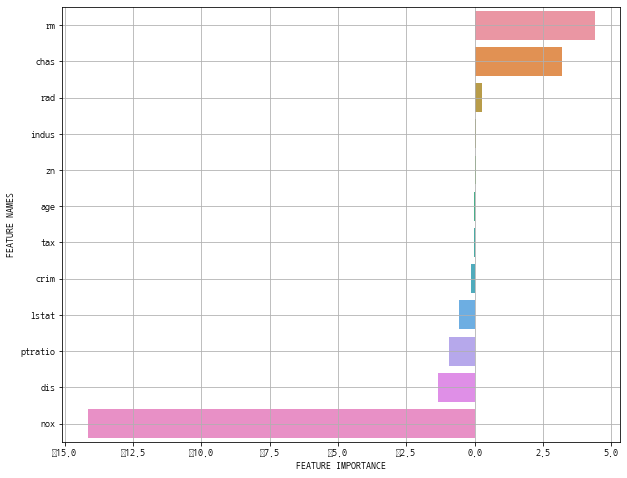

In [139]:
r = plot_feature_importance(model6.coef_, list(x_train))

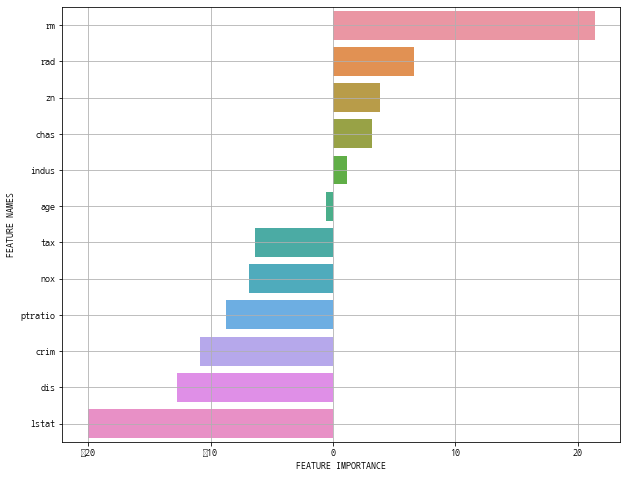

In [140]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)

# 다시 모델링
model7 = LinearRegression()
model7.fit(x_train_s, y_train)

r = plot_feature_importance(model7.coef_, list(x_train))

In [ ]:
# 선형회귀 모형의 변수 중요도를 이렇게 뽑을 수도 있다.
# 모델 해석 과목에서 변수 중요도에서 확인